# Data Understanding parte uno

In [32]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [33]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

-----------------------------------------------------
## • Data semantics

In [34]:
pd.set_option('display.max_columns', None) #print of dataframe for a general idea of how it is composed
pd.set_option('display.max_rows', None)
df.head(10)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
5,Sick Bubblegum,224266,True,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,NaN,0.0967,0.001520,0.000024,0.3840,0.4210,118.035,224267,4.0,432.0,106.0,NaN,1.279305,industrial
6,The Diamond Four,225160,False,27,Momoiro Clover Z,MOMOIRO CLOVER Z,0.777,0.949,2,-2.488,1.0,0.0585,0.306000,0.000016,0.2990,0.8500,109.992,225160,4.0,411.0,103.0,NaN,3.700483,j-idol
7,Quiero tener tu presencia,220626,False,64,Seguridad Social,Furia Latina,0.741,0.816,4,-5.597,NaN,0.0797,0.021100,0.000000,0.0981,0.5740,146.075,220626,4.0,517.0,129.0,NaN,0.916010,spanish
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116815,False,45,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.153,0.119,6,-25.160,NaN,0.0501,0.704000,0.913000,0.5430,0.0342,84.886,116815,NaN,162.0,40.0,NaN,1.170953,sleep
9,Into The Pentagram,405800,False,21,Samael,Worship Him,0.311,0.729,4,-7.047,1.0,0.0346,0.000116,0.222000,0.2250,0.1190,141.326,405800,4.0,882.0,221.0,NaN,0.916010,black-metal


In [35]:
df.shape #print of number of(rows,attributes)

(15000, 24)

In [36]:
df.info() # data type divided by attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe(include="all")

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,15000,1.500000e+04,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000
unique,15000,NaN,2,NaN,6257,9820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,Long Road,NaN,False,NaN,Vybz Kartel,The Hardcore Archive Part 3 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-dance
freq,1,NaN,14034,NaN,80,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750
mean,NaN,2.468075e+05,NaN,27.423667,NaN,NaN,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647,NaN
std,NaN,1.279941e+05,NaN,18.587534,NaN,NaN,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616,NaN
min,NaN,8.586000e+03,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116,NaN
25%,NaN,1.800000e+05,NaN,14.000000,NaN,NaN,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953,NaN
50%,NaN,2.278260e+05,NaN,24.000000,NaN,NaN,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916,NaN
75%,NaN,2.889030e+05,NaN,42.000000,NaN,NaN,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057,NaN


--------------------------------------------------------
## • Distribution of the variables and statistics

### Searching for non latin characters

In [38]:
import re

def contains_non_latin_characters(string):
    return bool(re.search('[^\u0000-\u007f]', string))

non_latin = df['name'].apply(contains_non_latin_characters)

df_non_latin=df[non_latin]["name"]
print(len(df_non_latin))

2558


### Searching for non valid value in numerical attributes

In [39]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' converte i valori non validi in NaN

# Verifica se ci sono valori non validi nelle colonne numeriche
invalid_values = df[numeric_columns].isna().any()
print(invalid_values)
# ci sono valori sbagliati sono nei 3 con missing values, va bene

duration_ms              False
popularity               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
dtype: bool


### Searching for number of artists

In [40]:
artists_counts = df['artists'].value_counts()
print(artists_counts.head(10))

Vybz Kartel                    80
Germaine Franco                75
Scooter                        74
Sarah, the Illstrumentalist    69
Jay Chou                       67
The Prophet                    64
Alphaxone                      56
Shiritsu Ebisu Chugaku         53
Nogizaka46                     53
Rammstein                      53
Name: artists, dtype: int64


### Plotting histogram for continuos attributes

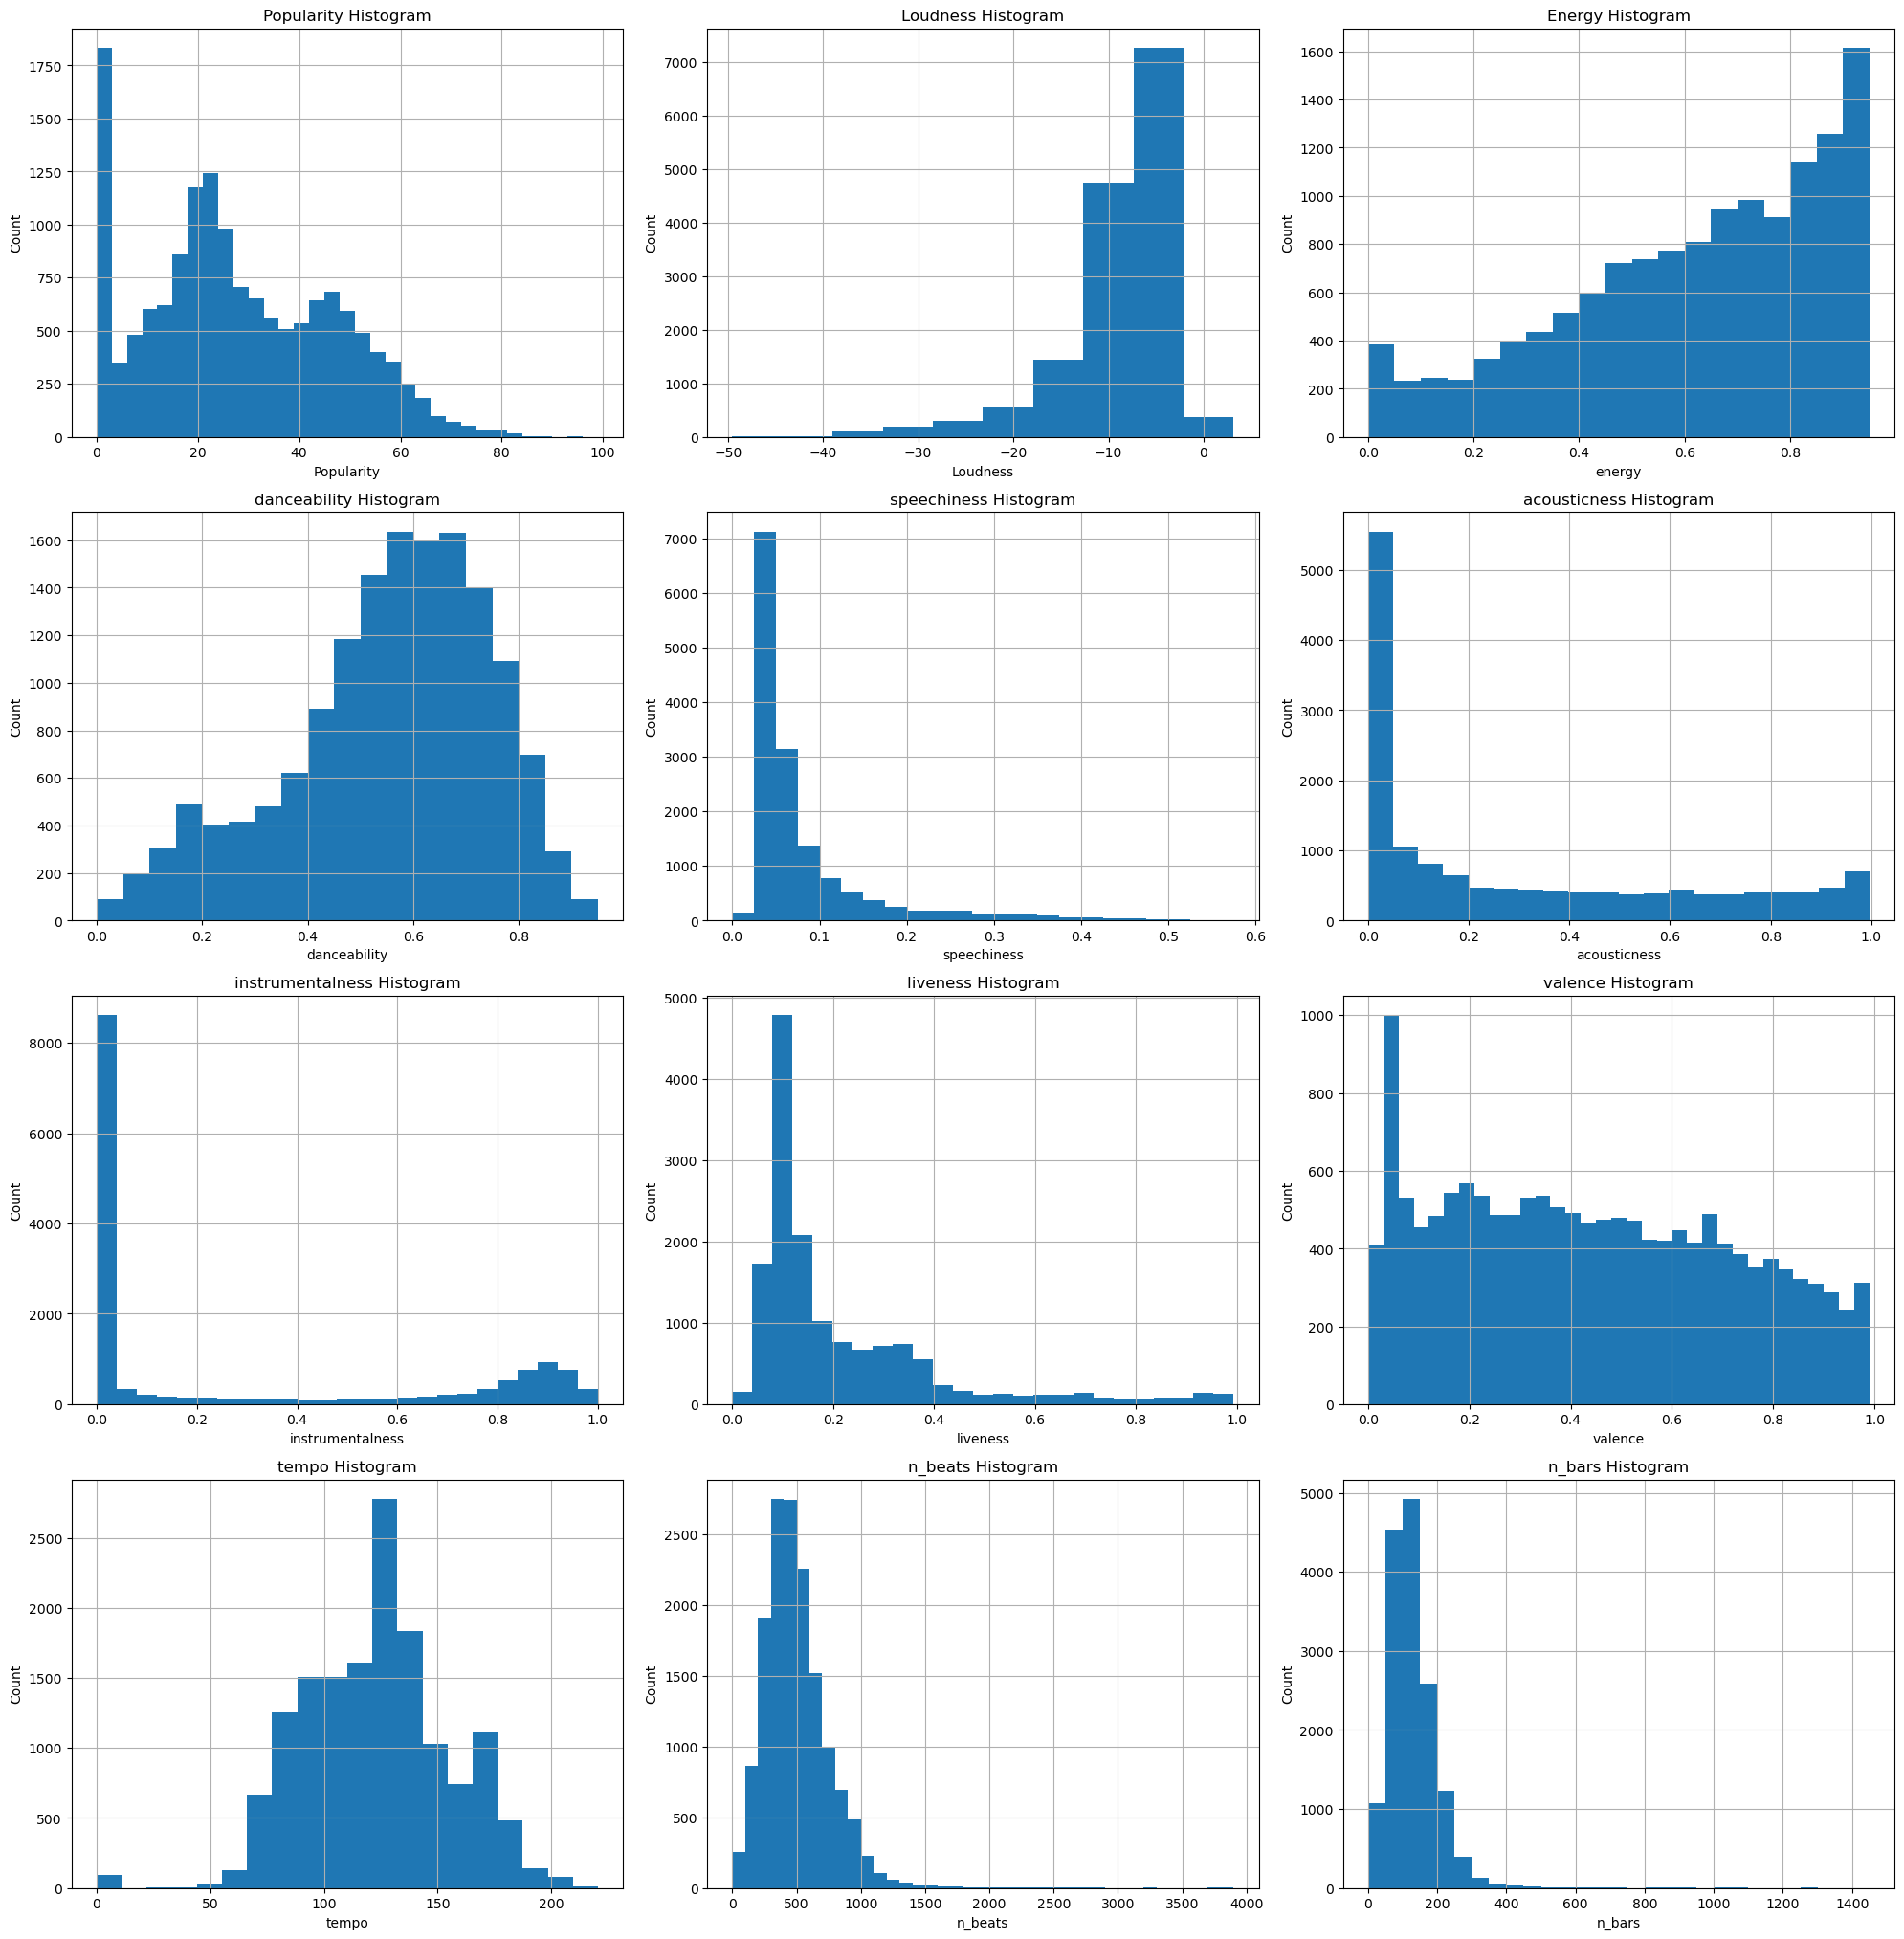

In [41]:
fig = plt.figure(figsize=(20, 25))  #dimension of figure where will be plotted hist
fig_dims = (5, 3)

sturges_bins=(int(math.log(len(df)))+1)  #plotting hist of popularity
plt.subplot2grid(fig_dims, (0, 0))
df['popularity'].hist(bins=np.arange(0,100,3))
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Histogram')

plt.subplot2grid(fig_dims, (0, 1))   #plotting hist of loudness
df['loudness'].hist(bins=sturges_bins)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Histogram')

plt.subplot2grid(fig_dims, (0, 2))  #plotting hist of energy
df['energy'].hist(bins=np.arange(0,1,0.05))
plt.xlabel('energy')
plt.ylabel('Count')
plt.title('Energy Histogram')

plt.subplot2grid(fig_dims, (1, 0))  #plotting hist of danceability
df['danceability'].hist(bins=np.arange(0,1,0.05))
plt.xlabel('danceability')
plt.ylabel('Count')
plt.title('danceability Histogram')

plt.subplot2grid(fig_dims, (1, 1))  #plotting hist of speechiness
df['speechiness'].hist(bins=np.arange(0,0.6,0.025))
plt.xlabel('speechiness')
plt.ylabel('Count')
plt.title('speechiness Histogram')

plt.subplot2grid(fig_dims, (1, 2))  #plotting hist of acousticness
df['acousticness'].hist(bins=20)
plt.xlabel('acousticness')
plt.ylabel('Count')
plt.title('acousticness Histogram')

plt.subplot2grid(fig_dims, (2, 0))  #plotting hist of instrumentalness
df['instrumentalness'].hist(bins=25)
plt.xlabel('instrumentalness')
plt.ylabel('Count')
plt.title('instrumentalness Histogram')

plt.subplot2grid(fig_dims, (2, 1))  #plotting hist of liveness
df['liveness'].hist(bins=25)
plt.xlabel('liveness')
plt.ylabel('Count')
plt.title('liveness Histogram')

plt.subplot2grid(fig_dims, (2, 2))  #plotting hist of valence
df['valence'].hist(bins=np.arange(0,1,0.03))
plt.xlabel('valence')
plt.ylabel('Count')
plt.title('valence Histogram')

plt.subplot2grid(fig_dims, (3, 0))  #plotting hist of tempo
df['tempo'].hist(bins=20)
plt.xlabel('tempo')
plt.ylabel('Count')
plt.title('tempo Histogram')

plt.subplot2grid(fig_dims, (3, 1))  #plotting hist of n_beats
df['n_beats'].hist(bins=np.arange(0,4000,100))
plt.xlabel('n_beats')
plt.ylabel('Count')
plt.title('n_beats Histogram')

plt.subplot2grid(fig_dims, (3, 2))  #plotting hist of n_bars
df['n_bars'].hist(bins=np.arange(0,1500,50))
plt.xlabel('n_bars')
plt.ylabel('Count')
plt.title('n_bars Histogram')

plt.tight_layout()  # this command is for a better rappresentation 

### Comparing duration_ms and features_duration_ms

Text(0.5, 1.0, 'Features_duration_m Histogram')

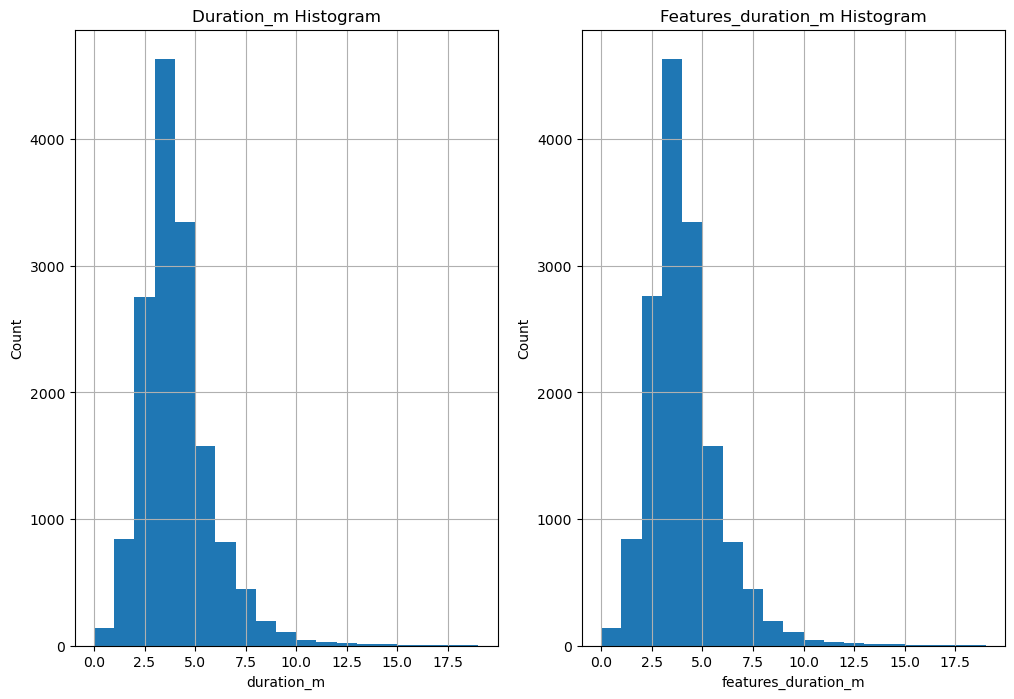

In [42]:
df_copy = df.copy() # copy of DataFrame
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Convert in 'duration_m' milliseconds to minutes
del df_copy['duration_ms']

fig = plt.figure(figsize=(12, 8)) 
fig_dims = (1, 2)

sturges_bins=(int(math.log(len(df)))+1)     #plotting 'Duration_m' 
plt.subplot2grid(fig_dims, (0, 0))
df_copy['duration_m'].hist(bins=np.arange(0,20,1))
plt.xlabel('duration_m')
plt.ylabel('Count')
plt.title('Duration_m Histogram')

df_copy = df.copy()
df_copy["features_duration_m"] = df["features_duration_ms"] / (60 * 1000)  # Convert in 'features_duration_ms milliseconds to minutes
del df_copy['features_duration_ms']

plt.subplot2grid(fig_dims, (0, 1))    #plotting 'features_duration_m' 
df_copy['features_duration_m'].hist(bins=np.arange(0,20,1))
plt.xlabel('features_duration_m')
plt.ylabel('Count')
plt.title('Features_duration_m Histogram')

### Plotting barchart 

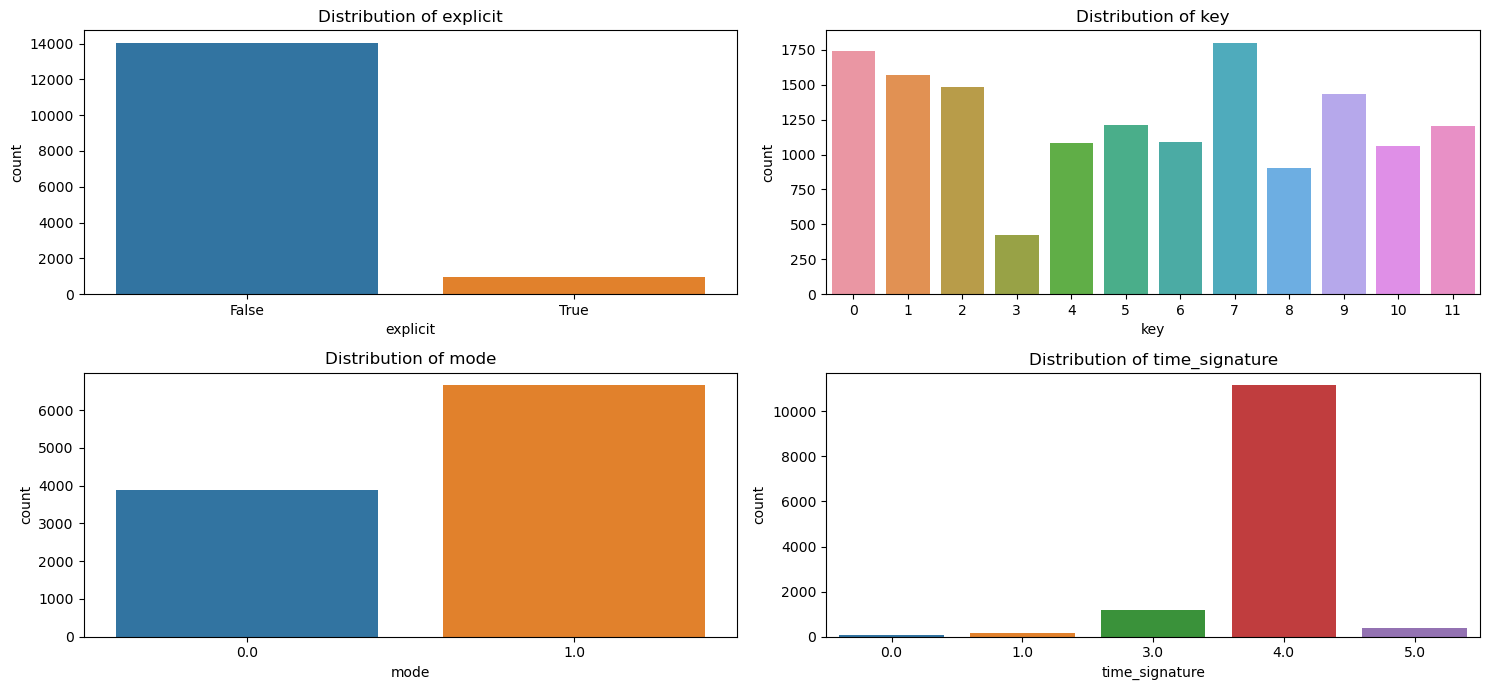

In [43]:
attributes = ["explicit","key","mode","time_signature"] # attributes that will be plot

n_rows = 2
n_cols = 2

plt.figure(figsize=(15,7))  

for i, attribute in enumerate(attributes):
    ax = plt.subplot2grid((n_rows, n_cols), (i // n_cols, i % n_cols))
    sns.countplot(data=df, x=attribute, ax=ax)
    ax.set_title(f'Distribution of {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('count')

plt.tight_layout() # better rappresentation of fig
plt.show()


In [44]:
genre_counts = df['genre'].value_counts()  # count of number of songs for genre
print(genre_counts)

j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64


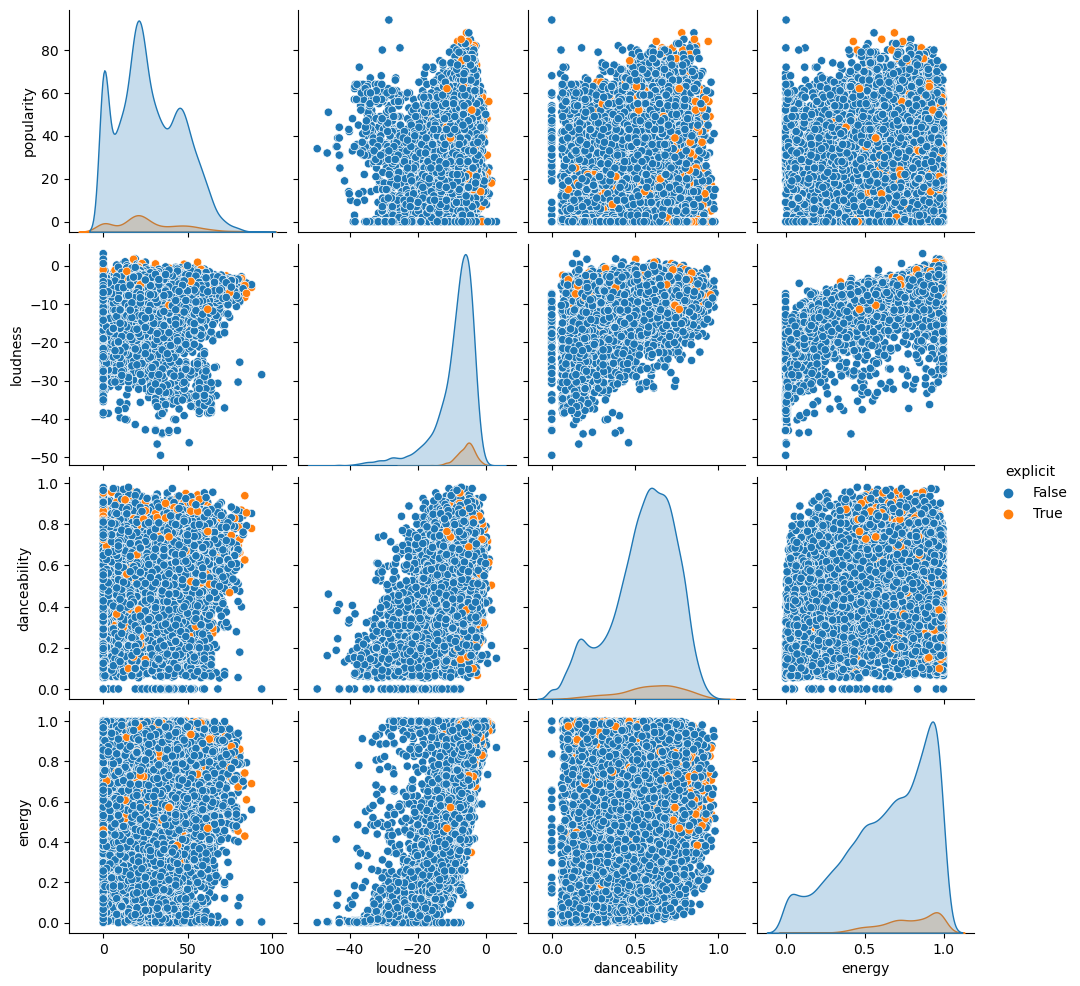

In [45]:
# Here we can see these attributes:'popularity', 'loudness', 'danceability', 'energy', 'explicit' compared whith 'explicit'
# scatterplot , (hue) =it color in different ways compare to if it explicit or not , (diag_kind) = on diagonal there will be KDE(Kernel Density Estimation)
sns.pairplot(df[['popularity', 'loudness', 'danceability', 'energy', 'explicit']], hue="explicit", diag_kind="kde")
plt.show()

-----------------------------------------------------------------------------------
## • Assessing data quality 

### Searching duplicate rows

In [46]:
# duplicate rows
duplicate_rows = df.duplicated()
rows= duplicate_rows.any()
if rows:
    print("There are some duplicated rows in the DataFrame.\n")
else:
    print("There aren't duplicated rows in the DataFrame.\n")
    
# duplicate names
name_rows=df["name"].duplicated()
names=name_rows.any()
if names:
    print("There are some names in the DataFrame.\n")
else:
    print("There aren't duplicated names in the DataFrame.\n")

There aren't duplicated rows in the DataFrame.

There aren't duplicated names in the DataFrame.



### Searching for outliers

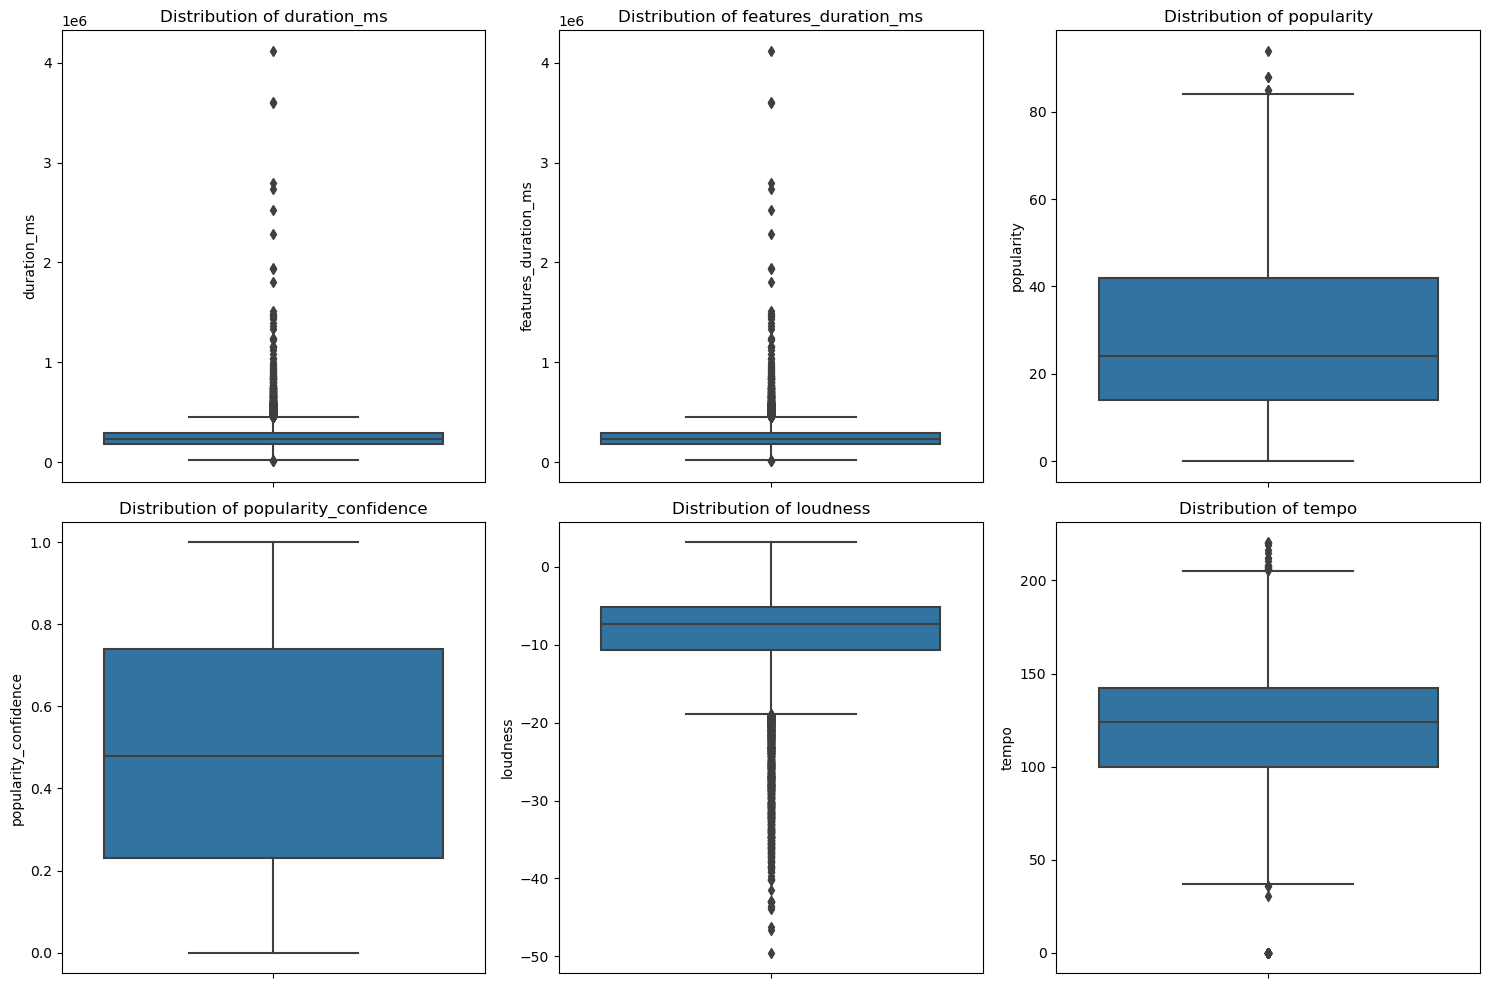

In [47]:
attributes = ["duration_ms", "features_duration_ms", "popularity", "popularity_confidence", "loudness", "tempo"]

n_rows = 3
n_cols = 3

plt.figure(figsize=(15, 15))  

for i, attribute in enumerate(attributes):
    ax = plt.subplot2grid((n_rows, n_cols), (i // n_cols, i % n_cols))
    sns.boxplot(data=df, y=attribute, ax=ax)
    ax.set_title(f'Distribution of {attribute}')
    ax.set_xlabel('')
    ax.set_ylabel(attribute)

plt.tight_layout()
plt.show()

In [48]:
# Dizionary for counting outliers for every attribute
outlier_counts = {}

# Counter outliers for every attribute using Tukey's method (it identifies outliers based on the spread of the data within the interquartile range.)
for attribute in attributes:

    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    attribute_outliers = df[(df[attribute] < lower_fence) | (df[attribute] > upper_fence)]
    outlier_counts[attribute] = len(attribute_outliers)

# printing results
for attribute in attributes:
    print(f"Outlier Count for {attribute}: {outlier_counts[attribute]}")


Outlier Count for duration_ms: 616
Outlier Count for features_duration_ms: 615
Outlier Count for popularity: 5
Outlier Count for popularity_confidence: 0
Outlier Count for loudness: 1004
Outlier Count for tempo: 113


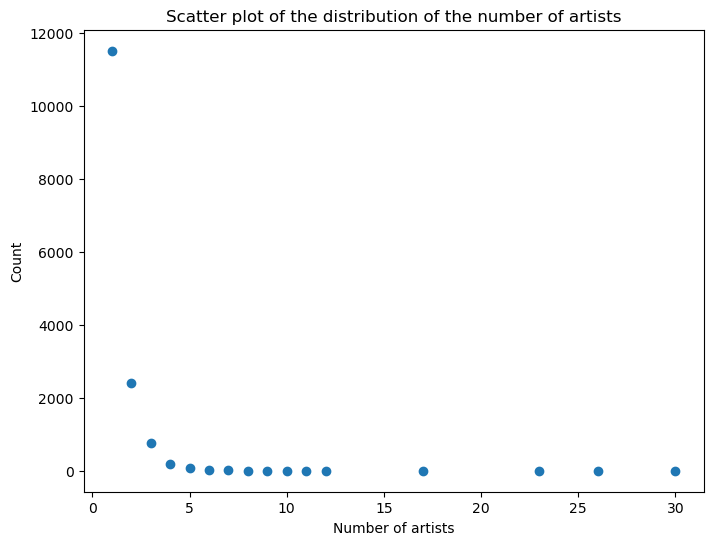

In [49]:
# 'num_artists' rappresent how many artist are associated to every rows of DataFrame 
df['num_artists'] = df['artists'].str.split(';').apply(len)   #when it finds ';' it counts 
artist_counts = df['num_artists'].value_counts().sort_index()

plt.figure(figsize=(8, 6))  #scatter plot of Number of artists

plt.scatter(artist_counts.index,  artist_counts.values)  
plt.ylabel('Count')
plt.xlabel('Number of artists')
plt.title('Scatter plot of the distribution of the number of artists')
plt.show()

### Searching for missing values

In [58]:
print(df.isnull().any()) # print if there are missing values 

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
num_artists              False
dtype: bool


In [59]:
print(df.isnull().sum()) # counter of missing values

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
num_artists                  0
dtype: int64


## Correlation

In [50]:
df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

C:\Users\lollo\AppData\Local\Temp\ipykernel_16416\1260216691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)


,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,num_artists
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400,0.002712
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878,0.028897
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733,0.046818
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273,0.031057
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847,-0.007957
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366,-0.001176
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563,-0.003471
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129,-0.008676
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909,0.054788
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684,0.006821


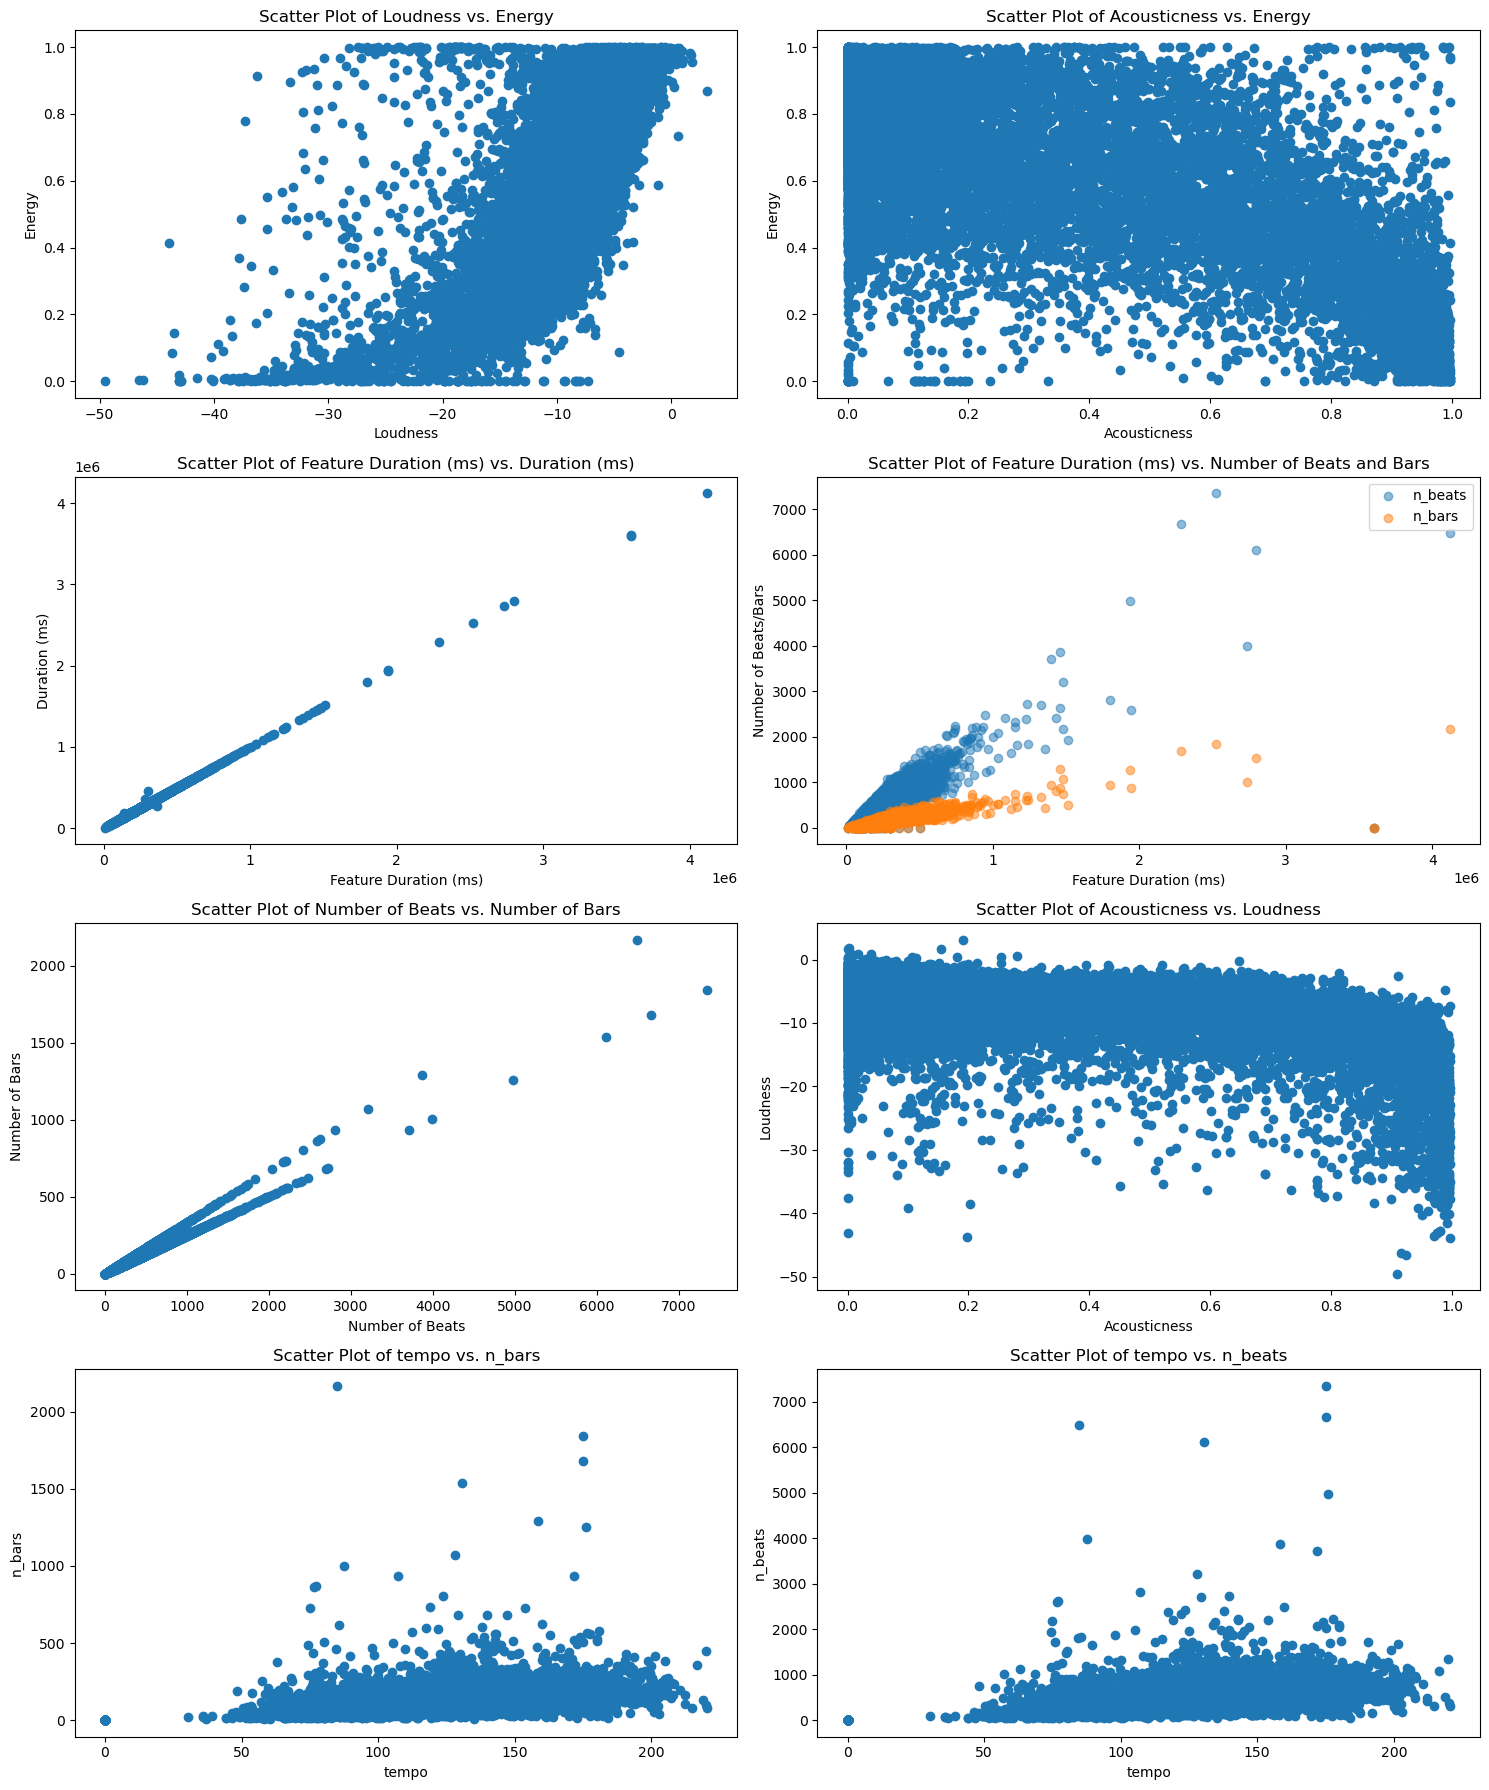

In [51]:
fig = plt.figure(figsize=(15, 18)) 
fig_dims = (4, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(df['loudness'], df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Loudness vs. Energy')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(df['acousticness'], df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Acousticness vs. Energy')

plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(df['features_duration_ms'], df['duration_ms'])
plt.xlabel('Feature Duration (ms)')
plt.ylabel('Duration (ms)')
plt.title('Scatter Plot of Feature Duration (ms) vs. Duration (ms)')

plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(df['features_duration_ms'], df['n_beats'], alpha=0.5, label='n_beats')
plt.scatter(df['features_duration_ms'], df['n_bars'], alpha=0.5, label='n_bars')
plt.xlabel('Feature Duration (ms)')
plt.ylabel('Number of Beats/Bars')
plt.title('Scatter Plot of Feature Duration (ms) vs. Number of Beats and Bars')
plt.legend()

plt.subplot2grid(fig_dims, (2, 0))
plt.scatter(df['n_beats'], df['n_bars'])
plt.xlabel('Number of Beats')
plt.ylabel('Number of Bars')
plt.title('Scatter Plot of Number of Beats vs. Number of Bars')

plt.subplot2grid(fig_dims, (2, 1))
plt.scatter(df['acousticness'], df['loudness'])
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Acousticness vs. Loudness')

plt.subplot2grid(fig_dims, (3, 0))
plt.scatter(df['tempo'], df['n_bars'])
plt.xlabel('tempo')
plt.ylabel('n_bars')
plt.title('Scatter Plot of tempo vs. n_bars')

plt.subplot2grid(fig_dims, (3, 1))
plt.scatter(df['tempo'], df['n_beats'])
plt.xlabel('tempo')
plt.ylabel('n_beats')
plt.title('Scatter Plot of tempo vs. n_beats')

plt.tight_layout()
plt.show()


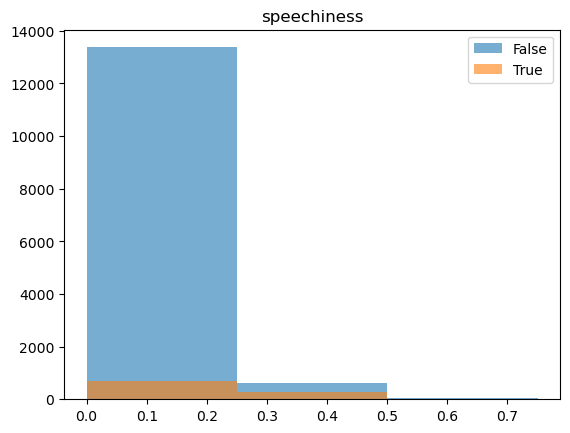

In [52]:
feature = 'speechiness'

for v in df['explicit'].unique():
    plt.hist(df[df['explicit'] == v][feature], 
             bins=np.arange(0, 1, 0.25),  
             label=v,  
             alpha=0.6  
            )
plt.title(feature)
plt.legend()
plt.show()